In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import mannwhitneyu
from pandas.api.types import is_numeric_dtype
import math 
import matplotlib.pyplot as plt
import dabest

# Importing Responses Data and adding Choice Column

In [27]:
all=['participant', 'Scene Type', 'AV_location','Senario ID','Type', 'Subject gender',
       'Subject age ', 'Left Age', 'Right Age', 'Left Gender', 'Right Gender',
       'hit_Pos']
data1=pd.read_csv('RESPONSES.csv')
data=data1[all].copy()
data = data.loc[data['Type'].notnull()]

data['Gender_hit']=0
data.loc[(data['hit_Pos'] =='L'), 'Gender_hit'] = data['Left Gender']
data.loc[(data['hit_Pos'] =='R'), 'Gender_hit'] = data['Right Gender']

# Form Choice table

In [28]:
scene='Text'
result_text=pd.DataFrame()
for participant in data['participant'].unique():
    
    df_g=data[(data['participant']==participant) & (data['Scene Type']==scene) & (data['Left Gender']!=data['Right Gender'])].copy()
    
    male=1-df_g['Gender_hit'].value_counts ()['male']/len(df_g['Gender_hit'])
    female=1-df_g['Gender_hit'].value_counts ()['female']/len(df_g['Gender_hit'])

    dd=pd.DataFrame(data={'participant':[participant], 'Gender':[data[data['participant']==participant]['Subject gender'].values[0]],
                          'T_male':[male],'T_female':[female]})
    result_text = pd.concat([result_text,dd])
    

scene='Video'
result_video=pd.DataFrame()
for participant in data['participant'].unique():
    
    df_g=data[(data['participant']==participant) & (data['Scene Type']==scene) & (data['Left Gender']!=data['Right Gender'])].copy()
    male=1-df_g['Gender_hit'].value_counts ()['male']/len(df_g['Gender_hit'])
    female=1-df_g['Gender_hit'].value_counts ()['female']/len(df_g['Gender_hit'])

    dd=pd.DataFrame(data={'participant':[participant], 'Gender':[data[data['participant']==participant]['Subject gender'].values[0]],
                          'V_male':[male],'V_female':[female]})
    result_video = pd.concat([result_video,dd])

# Plot Сhoice Results

In [23]:
text=result_text[['participant','Gender', 'T_male', 'T_female']]
video=result_video[['participant','Gender', 'V_male', 'V_female']]

RESULT=pd.concat([video,text], axis = 1)
RESULT=RESULT.loc[:,~RESULT.columns.duplicated()].copy()
RESULT_FEMALE=RESULT[RESULT['Gender']=='F']
RESULT_MALE=RESULT[RESULT['Gender']=='M']

RESULT_FEMALE_1=RESULT_FEMALE[['V_female','T_female']].rename(columns={"V_female": "Video_F", "T_female": "Picture_F"})
RESULT_MALE_1=RESULT_MALE[['V_female','T_female']].rename(columns={"V_female": "Video_M", "T_female": "Picture_M"})
RES=pd.concat([RESULT_FEMALE_1, RESULT_MALE_1], axis=1)

/Users/maksimenko/opt/anaconda3/lib/python3.10/site-packages/dabest/plotter.py:473: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  rawdata_plot = sns.swarmplot(data=plot_data, x=xvar, y=yvar,
/Users/maksimenko/opt/anaconda3/lib/python3.10/site-packages/dabest/plotter.py:563: UserWarning: FixedFormatter should only be used together with FixedLocator
  rawdata_axes.set_xticklabels(ticks_with_counts)


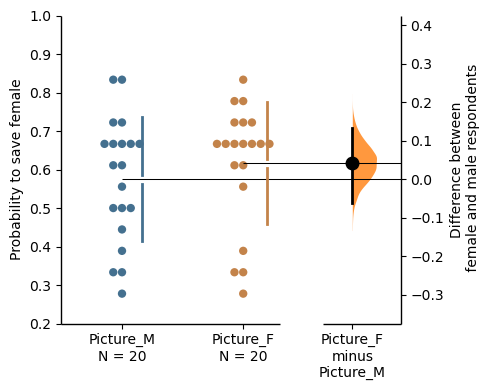

In [25]:
multi_2group = dabest.load(RES, idx=(("Picture_M", "Picture_F",)))

multi_2group.mean_diff.plot(swarm_ylim=(0.2, 1),
                                contrast_ylim=(-0.1, 0.2),swarm_label="Probability to save female",
                           contrast_label="Difference between\n female and male respondents");

#plt.savefig('/Users/maksimenko/Dropbox/!ETHICAL_AV_PAPER/CHOICES_NEW_Picture.eps',format='eps')

/Users/maksimenko/opt/anaconda3/lib/python3.10/site-packages/dabest/plotter.py:473: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  rawdata_plot = sns.swarmplot(data=plot_data, x=xvar, y=yvar,
/Users/maksimenko/opt/anaconda3/lib/python3.10/site-packages/dabest/plotter.py:563: UserWarning: FixedFormatter should only be used together with FixedLocator
  rawdata_axes.set_xticklabels(ticks_with_counts)


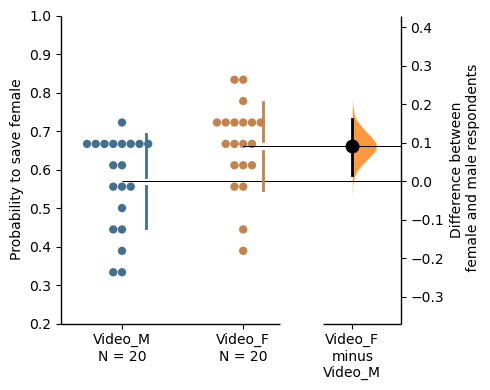

In [26]:
multi_2group = dabest.load(RES, idx=(("Video_M", "Video_F",)))

multi_2group.mean_diff.plot(swarm_ylim=(0.2, 1),
                                contrast_ylim=(-0.1, 0.2),swarm_label="Probability to save female",
                           contrast_label="Difference between\n female and male respondents");
#plt.savefig('/Users/maksimenko/Dropbox/!ETHICAL_AV_PAPER/CHOICES_NEW_Video.eps',format='eps')

# Correlation between probabilito to save female and ERSP

beta female:
SignificanceResult(statistic=-0.488399409238723, pvalue=0.02889348687850221)
SignificanceResult(statistic=-0.5106380070665583, pvalue=0.021410596150962996)
theta female:
SignificanceResult(statistic=-0.38979511210535306, pvalue=0.08933160187452815)
SignificanceResult(statistic=-0.019934817092688455, pvalue=0.933518669821688)
beta male:
SignificanceResult(statistic=0.045595285326489834, pvalue=0.8486216846959063)
SignificanceResult(statistic=-0.36379389517600647, pvalue=0.11484947398483432)
theta male:
SignificanceResult(statistic=-0.3009288831548329, pvalue=0.19730301228915428)
SignificanceResult(statistic=-0.34509784917124375, pvalue=0.13617839392881118)
alpha female:
SignificanceResult(statistic=-0.27732458568760293, pvalue=0.23650334141935378)
SignificanceResult(statistic=-0.39946306558810335, pvalue=0.0809991090105221)
alpha male:
SignificanceResult(statistic=-0.12082750611519806, pvalue=0.6118534992417917)
SignificanceResult(statistic=-0.22045754247282615, pvalue=0.35

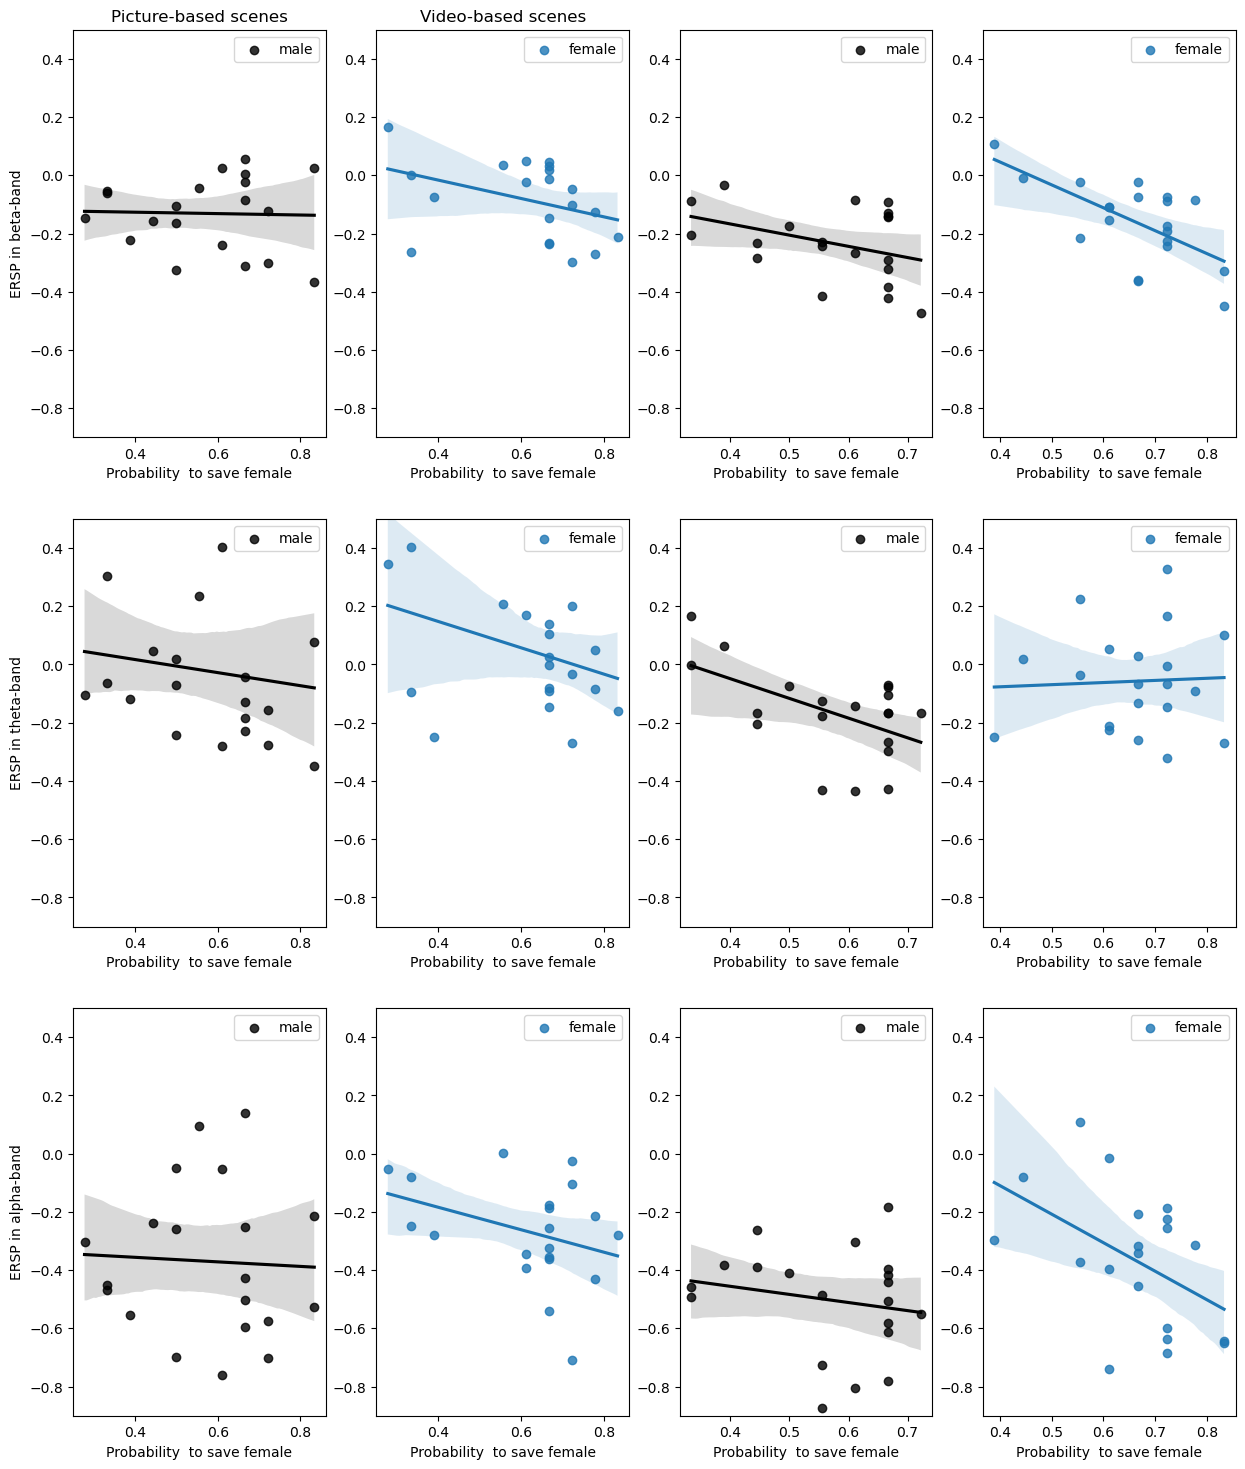

In [86]:
from scipy.stats import spearmanr

beta=pd.read_csv('/Users/maksimenko/Dropbox/!Hein/!FINAL_DATA/MATLAB_OUTPUT/result_beta_ERSP.csv')
alpha=pd.read_csv('/Users/maksimenko/Dropbox/!Hein/!FINAL_DATA/MATLAB_OUTPUT/result_alpha_ERSP.csv')
theta=pd.read_csv('/Users/maksimenko/Dropbox/!Hein/!FINAL_DATA/MATLAB_OUTPUT/result_theta_ERSP.csv')

beta.reset_index(drop=True, inplace=True)
theta.reset_index(drop=True, inplace=True)
alpha.reset_index(drop=True, inplace=True)
result_text.reset_index(drop=True, inplace=True)
result_video.reset_index(drop=True, inplace=True)

beta1=beta[['participant','Video','Text']]
BETA_FEMALE = RESULT_FEMALE.merge(beta1, on=['participant'])
BETA_MALE = RESULT_MALE.merge(beta1, on=['participant'])

theta1=theta[['participant','Video','Text']]
THETA_FEMALE = RESULT_FEMALE.merge(theta1, on=['participant'])
THETA_MALE = RESULT_MALE.merge(theta1, on=['participant'])

alpha1=alpha[['participant','Video','Text']]
ALPHA_FEMALE = RESULT_FEMALE.merge(alpha1, on=['participant'])
ALPHA_MALE = RESULT_MALE.merge(alpha1, on=['participant'])


print('beta female:')

print(spearmanr(BETA_FEMALE['T_female'].to_numpy(), BETA_FEMALE['Text'].to_numpy()))
print(spearmanr(BETA_FEMALE['V_female'].to_numpy(), BETA_FEMALE['Video'].to_numpy()))

print('theta female:')

print(spearmanr(THETA_FEMALE['T_female'].to_numpy(), THETA_FEMALE['Text'].to_numpy()))
print(spearmanr(THETA_FEMALE['V_female'].to_numpy(), THETA_FEMALE['Video'].to_numpy()))

print('beta male:')

print(spearmanr(BETA_MALE['T_female'].to_numpy(), BETA_MALE['Text'].to_numpy()))
print(spearmanr(BETA_MALE['V_female'].to_numpy(), BETA_MALE['Video'].to_numpy()))

print('theta male:')

print(spearmanr(THETA_MALE['T_female'].to_numpy(), THETA_MALE['Text'].to_numpy()))
print(spearmanr(THETA_MALE['V_female'].to_numpy(), THETA_MALE['Video'].to_numpy()))

print('alpha female:')

print(spearmanr(ALPHA_FEMALE['T_female'].to_numpy(), ALPHA_FEMALE['Text'].to_numpy()))
print(spearmanr(ALPHA_FEMALE['V_female'].to_numpy(), ALPHA_FEMALE['Video'].to_numpy()))

print('alpha male:')

print(spearmanr(ALPHA_MALE['T_female'].to_numpy(), ALPHA_MALE['Text'].to_numpy()))
print(spearmanr(ALPHA_MALE['V_female'].to_numpy(), ALPHA_MALE['Video'].to_numpy()))




f, axes=plt.subplots(nrows=3,ncols=4,figsize=(15,18))

reg1=sns.regplot(x='T_female', y='Text',data=BETA_MALE, ax=axes[0,0],label="male", color='black');
reg2=sns.regplot(x='T_female', y='Text',data=BETA_FEMALE, ax=axes[0,1],label="female");
reg3=sns.regplot(x='V_female', y='Video',data=BETA_MALE, ax=axes[0,2],label="male", color='black');
reg4=sns.regplot(x='V_female', y='Video',data=BETA_FEMALE, ax=axes[0,3],label="female");

reg5=sns.regplot(x='T_female', y='Text',data=THETA_MALE, ax=axes[1,0],label="male", color='black');
reg6=sns.regplot(x='T_female', y='Text',data=THETA_FEMALE, ax=axes[1,1],label="female");
reg7=sns.regplot(x='V_female', y='Video',data=THETA_MALE, ax=axes[1,2],label="male", color='black');
reg8=sns.regplot(x='V_female', y='Video',data=THETA_FEMALE, ax=axes[1,3],label="female");

reg9=sns.regplot(x='T_female', y='Text',data=ALPHA_MALE, ax=axes[2,0],label="male", color='black');
reg10=sns.regplot(x='T_female', y='Text',data=ALPHA_FEMALE, ax=axes[2,1],label="female");
reg11=sns.regplot(x='V_female', y='Video',data=ALPHA_MALE, ax=axes[2,2],label="male", color='black');
reg12=sns.regplot(x='V_female', y='Video',data=ALPHA_FEMALE, ax=axes[2,3],label="female");






reg1.set(xlabel='Probability  to save female', ylabel='ERSP in beta-band');
reg2.set(xlabel='Probability  to save female', ylabel=None);
reg3.set(xlabel='Probability  to save female', ylabel=None);
reg4.set(xlabel='Probability  to save female',ylabel=None);
reg5.set(xlabel='Probability  to save female', ylabel='ERSP in theta-band');
reg6.set(xlabel='Probability  to save female', ylabel=None);
reg7.set(xlabel='Probability  to save female', ylabel=None);
reg8.set(xlabel='Probability  to save female',ylabel=None);
reg9.set(xlabel='Probability  to save female', ylabel='ERSP in alpha-band');
reg10.set(xlabel='Probability  to save female', ylabel=None);
reg11.set(xlabel='Probability  to save female', ylabel=None);
reg12.set(xlabel='Probability  to save female',ylabel=None);

reg1.title.set_text('Picture-based scenes')
#reg3.title.set_text('Picture-based scenes')

reg2.title.set_text('Video-based scenes')
#reg4.title.set_text('Video-based scenes')

axes[0,0].set_ylim([-0.9, 0.5])
axes[0,1].set_ylim([-0.9, 0.5])
axes[0,2].set_ylim([-0.9, 0.5])
axes[0,3].set_ylim([-0.9, 0.5])
axes[1,0].set_ylim([-0.9, 0.5])
axes[1,1].set_ylim([-0.9, 0.5])
axes[1,2].set_ylim([-0.9, 0.5])
axes[1,3].set_ylim([-0.9, 0.5])
axes[2,0].set_ylim([-0.9, 0.5])
axes[2,1].set_ylim([-0.9, 0.5])
axes[2,2].set_ylim([-0.9, 0.5])
axes[2,3].set_ylim([-0.9, 0.5])

reg1.legend(loc="upper right")
reg2.legend(loc="upper right")
reg3.legend(loc="upper right")
reg4.legend(loc="upper right")
reg5.legend(loc="upper right")
reg6.legend(loc="upper right")
reg7.legend(loc="upper right")
reg8.legend(loc="upper right")
reg9.legend(loc="upper right")
reg10.legend(loc="upper right")
reg11.legend(loc="upper right")
reg12.legend(loc="upper right")


#axes[0].set_xlim([0.25, 0.9])
#axes[1].set_xlim([0.25, 0.9])
#axes[2].set_xlim([0.25, 0.9])
#axes[3].set_xlim([0.25, 0.9])

#plt.savefig('/Users/maksimenko/Dropbox/!ETHICAL_AV_PAPER/correlation-all.eps',format='eps')

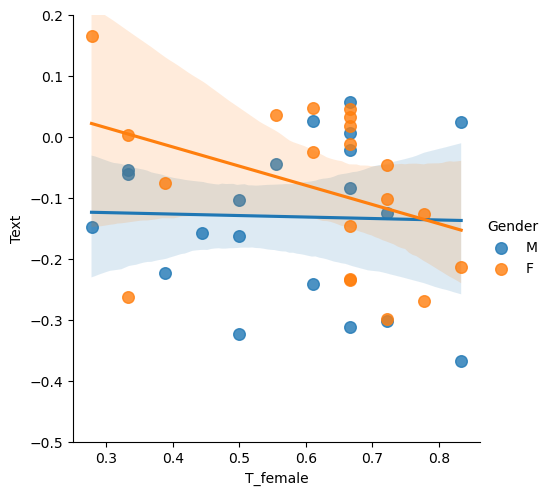

In [108]:
BETA_ALL=pd.concat((BETA_MALE,BETA_FEMALE))
g=sns.lmplot(x="T_female", y='Text', hue="Gender", data=BETA_ALL, scatter_kws={"s": 70})
g.set(ylim=(-0.5, 0.2))
plt.savefig('/Users/maksimenko/Dropbox/!ETHICAL_AV_PAPER/correlation-picture-beta.eps',format='eps')

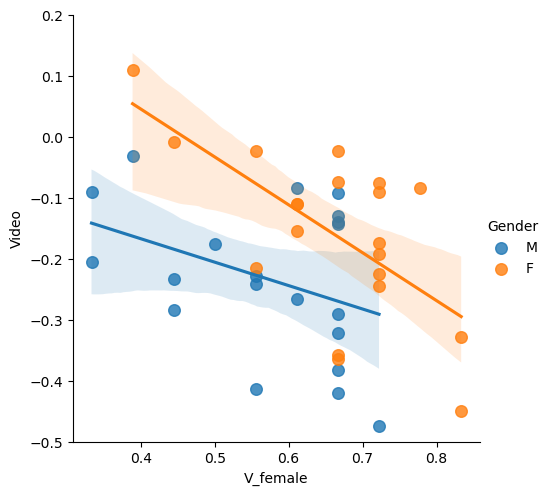

In [109]:
BETA_ALL=pd.concat((BETA_MALE,BETA_FEMALE))
g=sns.lmplot(x="V_female", y='Video', hue="Gender", data=BETA_ALL, scatter_kws={"s": 70})
g.set(ylim=(-0.5, 0.2))
plt.savefig('/Users/maksimenko/Dropbox/!ETHICAL_AV_PAPER/correlation-video-beta.eps',format='eps')

# Form Consistency table

In [31]:
participant_id=[]
res_text=[]
res_video=[]
gender=[]

for participant in data['participant'].unique():
    df=data[(data['participant']==participant) & (data['Scene Type']=='Text')].copy()
    l=df['Senario ID'].nunique ();
    #print(l)
    res=0
    for scenario in df['Senario ID'].unique():  
        d=2-df[df['Senario ID']==scenario]['hit_Pos'].nunique ()
        res=res+d/l
    #print(res)
    res_text.append(res)
    
    df=data[(data['participant']==participant) & (data['Scene Type']=='Video')].copy()
    l=df['Senario ID'].nunique ();
    #print(l)
    res=0
    for scenario in df['Senario ID'].unique():  
        d=2-df[df['Senario ID']==scenario]['hit_Pos'].nunique ()
        res=res+d/l
    #print(res)
    res_video.append(res)    
    
    participant_id.append(participant)
    gender.append(data[data['participant']==participant]['Subject gender'].values[0])

consistency=pd.DataFrame(data={'participant':participant_id, 'Gender':gender,'con_V':res_video, 'con_T':res_text})

consistency_male=consistency[consistency['Gender']=='M']
consistency_female=consistency[consistency['Gender']=='F']

U= 167.0 p = 0.3834132819043589
U= 219.0 p = 0.6204650618056817


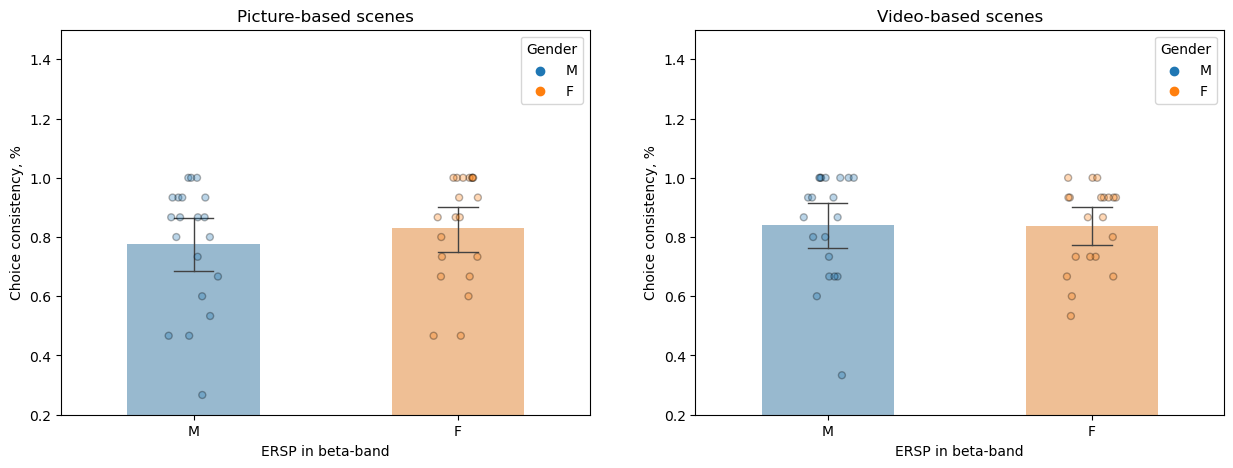

In [35]:
f, axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))

#p1=sns.barplot([consistency_male['con_T'],consistency_female['con_T']], errorbar=('ci', 95), width=0.5,alpha=0.5,capsize=.15, errwidth=1,ax=axes[0])
#p2=sns.barplot([consistency_male['con_V'],consistency_female['con_V']], errorbar=('ci', 95), width=0.5,alpha=0.5,capsize=.15, errwidth=1,ax=axes[1])


p1=sns.barplot(data=consistency, x='Gender', y='con_T', errorbar=('ci', 95), width=0.5,alpha=0.5,capsize=.15, errwidth=1,ax=axes[0])

p1=sns.stripplot(data=consistency, x='Gender', y='con_T', ax=axes[0], 
                 size=5, edgecolor='black', linewidth=1, alpha = 0.3, hue='Gender')

p2=sns.barplot(data=consistency, x='Gender', y='con_V', errorbar=('ci', 95), width=0.5,alpha=0.5,capsize=.15, errwidth=1,ax=axes[1])


p2=sns.stripplot(data=consistency, x='Gender', y='con_V', ax=axes[1], 
                 size=5, edgecolor='black', linewidth=1, alpha = 0.3, hue='Gender')

p1.title.set_text('Picture-based scenes')
p2.title.set_text('Video-based scenes')

p1.set(ylabel='Choice consistency, %', xlabel='ERSP in beta-band')
p2.set(ylabel='Choice consistency, %', xlabel='ERSP in beta-band')

axes[0].set_ylim([0.2, 1.5])
axes[1].set_ylim([0.2, 1.5])

U1, p = mannwhitneyu(consistency_male['con_T'],consistency_female['con_T'], method="exact")
print('U=',U1,'p =',p)

U1, p = mannwhitneyu(consistency_male['con_V'],consistency_female['con_V'], method="exact")
print('U=',U1,'p =',p)

plt.savefig('/Users/maksimenko/Dropbox/!ETHICAL_AV_PAPER/choice consistency-new.eps',format='eps')